In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Yahoo Finance Bitcoin Price Data from 4/26/2019 - 4/25/2024
#df = pd.read_csv("BTC-USD.csv")
df = pd.read_csv("training_data.csv")

In [4]:
# split date into month, day, year
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

df = df.drop(columns=['NASDAQ-Vol.', 'DOW-Vol.', 'GOLD-Vol.', 'OIL-Vol.'])
df.replace(',', '', regex=True, inplace=True)

In [204]:
#df.to_csv("training_data_1.csv", index=False)

In [5]:
df.head()

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
0,2019-04-27,5279.471191,5310.750000,5233.635742,5268.291016,5268.291016,1.311127e+10,156.270859,160.589417,155.621887,...,1280.10,1290.90,1276.00,63.30,65.13,65.18,62.28,4,27,2019
1,2019-04-28,5271.746582,5326.231934,5255.683594,5285.139160,5285.139160,1.281999e+10,158.499771,159.565384,157.125519,...,1280.10,1290.90,1276.00,63.30,65.13,65.18,62.28,4,28,2019
2,2019-04-29,5284.858398,5311.274902,5216.487793,5247.352539,5247.352539,1.373549e+10,157.291061,158.333923,153.186523,...,1287.00,1288.60,1279.90,63.50,62.95,63.69,62.46,4,29,2019
3,2019-04-30,5247.726074,5363.257324,5224.189941,5350.726563,5350.726563,1.387896e+10,155.172775,162.432251,155.172775,...,1283.50,1288.20,1281.60,63.91,63.58,64.75,63.30,4,30,2019
4,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,1.367953e+10,162.186554,164.060684,159.660217,...,1284.20,1289.40,1274.50,63.60,63.40,63.93,62.77,5,1,2019


In [6]:
df.shape

(1827, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1827 non-null   datetime64[ns]
 1   BTC-Open        1827 non-null   float64       
 2   BTC-High        1827 non-null   float64       
 3   BTC-Low         1827 non-null   float64       
 4   BTC-Close       1827 non-null   float64       
 5   BTC-Adj Close   1827 non-null   float64       
 6   BTC-Volume      1827 non-null   float64       
 7   ETH-Open        1827 non-null   float64       
 8   ETH-High        1827 non-null   float64       
 9   ETH-Low         1827 non-null   float64       
 10  ETH-Close       1827 non-null   float64       
 11  ETH-Adj Close   1827 non-null   float64       
 12  ETH-Volume      1827 non-null   int64         
 13  DOGE-Open       1827 non-null   float64       
 14  DOGE-High       1827 non-null   float64       
 15  DOGE

In [8]:
df.describe()

,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,ETH-Close,...,DOGE-Close,DOGE-Adj Close,DOGE-Volume,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03,1827.000000,1827.000000,1827.000000,1827.000000,...,1827.000000,1827.000000,1.827000e+03,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,27903.017911,28540.127225,27223.875046,27932.786384,27932.786384,3.064159e+10,1590.209333,1634.175879,1542.183818,1591.629513,...,0.084405,0.084405,1.241579e+09,68.695506,68.673837,69.939130,67.355977,6.521073,15.735085,2021.318555
std,17110.448917,17542.744751,16615.417343,17119.382361,17119.382361,1.788987e+10,1184.636850,1218.638084,1145.545381,1184.270857,...,0.094356,0.094356,3.518127e+09,20.554601,20.403997,20.733893,20.211910,3.450157,8.804801,1.490128
min,5002.578125,5310.750000,4106.980957,4970.788086,4970.788086,5.331173e+09,110.406784,116.021622,95.184303,110.605873,...,0.001537,0.001537,1.581394e+07,-37.630000,-14.000000,13.690000,-40.320000,1.000000,1.000000,2019.000000
25%,10832.751950,11050.714355,10621.600100,10850.005860,10850.005860,1.872074e+10,318.068786,328.303589,308.689636,319.124893,...,0.003060,0.003060,1.221305e+08,55.610000,55.720000,56.540000,54.550000,4.000000,8.000000,2020.000000
50%,26130.748050,26514.716800,25802.408200,26162.373050,26162.373050,2.689636e+10,1629.297729,1656.932739,1588.328979,1629.655273,...,0.067990,0.067990,3.605253e+08,71.430000,71.480000,72.300000,70.110000,7.000000,16.000000,2021.000000
75%,40808.408205,42026.515625,39704.246090,40847.884765,40847.884765,3.774689e+10,2302.893677,2366.600708,2225.065796,2305.931397,...,0.112196,0.112196,1.006780e+09,81.225000,81.320000,82.480000,80.100000,10.000000,23.000000,2023.000000
max,73079.375000,73750.070310,71334.093750,73083.500000,73083.500000,3.510000e+11,4810.071289,4891.704590,4718.039063,4812.087402,...,0.684777,0.684777,6.941068e+10,123.700000,124.660000,130.500000,120.790000,12.000000,31.000000,2024.000000


In [9]:
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

Null Values: 0
NA values: False


In [10]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2019-04-27 00:00:00
Ending Date 2024-04-26 00:00:00


In [11]:
df.columns

Index(['Date', 'BTC-Open', 'BTC-High', 'BTC-Low', 'BTC-Close', 'BTC-Adj Close',
       'BTC-Volume', 'ETH-Open', 'ETH-High', 'ETH-Low', 'ETH-Close',
       'ETH-Adj Close', 'ETH-Volume', 'DOGE-Open', 'DOGE-High', 'DOGE-Low',
       'DOGE-Close', 'DOGE-Adj Close', 'DOGE-Volume', 'S&P-Price', 'S&P-Open',
       'S&P-High', 'S&P-Low', 'NASDAQ-Price', 'NASDAQ-Open', 'NASDAQ-High',
       'NASDAQ-Low', 'DOW-Price', 'DOW-Open', 'DOW-High', 'DOW-Low',
       'GOLD-Price', 'GOLD-Open', 'GOLD-High', 'GOLD-Low', 'OIL-Price',
       'OIL-Open', 'OIL-High', 'OIL-Low', 'Month', 'Day', 'Year'],
      dtype='object')

In [39]:
#X = df[['Month', 'Day', 'Year', 'Open', 'High', 'Low', 'Close', 'Volume']]
#X = df[['Month', 'Day', 'Year', 'Open', 'Volume']]
#X = df[['Month', 'Day', 'Year', 'BTC-Open', 'BTC-Adj Close',
#       'BTC-Volume', 'ETH-Open', 'ETH-High', 'ETH-Low', 'ETH-Close',
#       'ETH-Adj Close', 'ETH-Volume', 'DOGE-Open', 'DOGE-High', 'DOGE-Low',
#       'DOGE-Close', 'DOGE-Adj Close', 'DOGE-Volume', 'S&P-Price', 'S&P-Open',
#       'S&P-High', 'S&P-Low', 'NASDAQ-Price', 'NASDAQ-Open', 'NASDAQ-High',
#       'NASDAQ-Low', 'DOW-Price', 'DOW-Open', 'DOW-High',
#       'DOW-Low', 'GOLD-Price', 'GOLD-Open', 'GOLD-High',
#       'GOLD-Low', 'OIL-Price', 'OIL-Open', 'OIL-High', 'OIL-Low']]
X = df.drop(columns=['Date','BTC-High', 'BTC-Low', 'BTC-Close'])
y = df[['BTC-High', 'BTC-Low', 'BTC-Close']]

In [83]:
X.columns

Index(['BTC-Open', 'BTC-Adj Close', 'BTC-Volume', 'ETH-Open', 'ETH-High',
       'ETH-Low', 'ETH-Close', 'ETH-Adj Close', 'ETH-Volume', 'DOGE-Open',
       'DOGE-High', 'DOGE-Low', 'DOGE-Close', 'DOGE-Adj Close', 'DOGE-Volume',
       'S&P-Price', 'S&P-Open', 'S&P-High', 'S&P-Low', 'NASDAQ-Price',
       'NASDAQ-Open', 'NASDAQ-High', 'NASDAQ-Low', 'DOW-Price', 'DOW-Open',
       'DOW-High', 'DOW-Low', 'GOLD-Price', 'GOLD-Open', 'GOLD-High',
       'GOLD-Low', 'OIL-Price', 'OIL-Open', 'OIL-High', 'OIL-Low', 'Month',
       'Day', 'Year'],
      dtype='object')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [52]:
X_train

,BTC-Open,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,ETH-Close,ETH-Adj Close,ETH-Volume,DOGE-Open,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
73,12284.326170,12573.812500,2.816792e+10,313.325165,318.223114,305.285828,308.881012,308.881012,10055159803,0.003556,...,1397.90,1402.40,1387.50,57.83,57.56,59.10,57.29,7,9,2019
1663,35548.113280,37880.582030,2.736582e+10,1979.472656,2061.991699,1968.774658,2060.408447,2060.408447,12626326991,0.072456,...,1966.90,1979.20,1958.80,76.66,78.17,78.77,76.31,11,15,2023
69,11203.102540,10978.459960,2.383848e+10,284.380920,293.921143,282.694702,287.997528,287.997528,8723493015,0.003226,...,1426.50,1427.90,1393.00,57.51,57.38,57.82,56.29,7,5,2019
162,8149.876953,7988.155762,1.316083e+10,176.364380,177.364548,171.299774,173.059143,173.059143,5852890674,0.002323,...,1511.60,1522.20,1501.40,52.81,52.29,53.35,52.04,10,6,2019
526,10550.440430,10669.583010,7.125178e+10,346.602234,354.045746,345.131012,352.579010,352.579010,10696959020,0.002606,...,1911.00,1923.60,1895.20,37.05,38.60,38.65,36.63,10,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,31723.865230,31792.310550,3.353821e+10,1996.408081,2005.490967,1932.352051,1942.328003,1942.328003,18363115560,0.087865,...,1856.50,1867.90,1837.60,114.67,114.96,119.98,114.15,5,31,2022
1294,17583.251950,17034.292970,5.587162e+10,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099,0.089779,...,1758.30,1775.60,1750.30,88.96,86.27,90.10,86.18,11,11,2022
860,49288.250000,50025.375000,4.320618e+10,3787.486572,4022.469238,3712.678223,3940.614746,3940.614746,26207765094,0.294754,...,1811.50,1836.90,1810.90,69.29,69.76,70.53,69.05,9,3,2021
1459,27514.873050,28307.597660,1.773337e+10,1842.204346,1877.484985,1805.322876,1866.753662,1866.753662,8677255481,0.078783,...,1995.40,2005.00,1979.30,77.07,78.74,79.07,76.50,4,25,2023


In [53]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=42)

In [54]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [55]:
predictions = rf_regressor.predict(X_test)

In [56]:
mse_high = mean_squared_error(y_test['BTC-High'], predictions[:, 0])
mse_low = mean_squared_error(y_test['BTC-Low'], predictions[:, 1])
mse_close = mean_squared_error(y_test['BTC-Close'], predictions[:, 2])

In [57]:
print("Mean Squared Error for High Price Prediction:", mse_high)
print("Mean Squared Error for Low Price Prediction:", mse_low)
print("Mean Squared Error for Closing Price Prediction:", mse_close)

Mean Squared Error for High Price Prediction: 307521.32975806855
Mean Squared Error for Low Price Prediction: 380698.4677759152
Mean Squared Error for Closing Price Prediction: 26209.157814825117


In [58]:
date = pd.to_datetime(X_test[['Month', 'Day', 'Year']])

In [59]:
results = pd.DataFrame({
    'Date': date,
    'Actual_High_Price': y_test['BTC-High'],
    'Predicted_High_Price': predictions[:, 0],
    'Actual_Low_Price': y_test['BTC-Low'],
    'Predicted_Low_Price': predictions[:, 1],
    'Actual_Close_Price': y_test['BTC-Close'],
    'Predicted_Close_Price': predictions[:, 2]
})
results = results.sort_values(by='Date')

In [60]:
results.head()

,Date,Actual_High_Price,Predicted_High_Price,Actual_Low_Price,Predicted_Low_Price,Actual_Close_Price,Predicted_Close_Price
23,2019-05-20,8200.967773,8195.858722,7678.781738,7834.853686,7978.309082,7996.788718
29,2019-05-26,8687.520508,8727.520658,7924.670410,8069.359262,8673.215820,8667.128585
49,2019-06-15,8859.127930,8897.584366,8618.395508,8620.967088,8838.375000,8788.039125
59,2019-06-25,11790.916990,11854.542867,11007.202150,11032.406806,11790.916990,11740.542420
65,2019-07-01,11206.439450,10972.535680,10089.314450,10051.073361,10583.134770,10734.449352


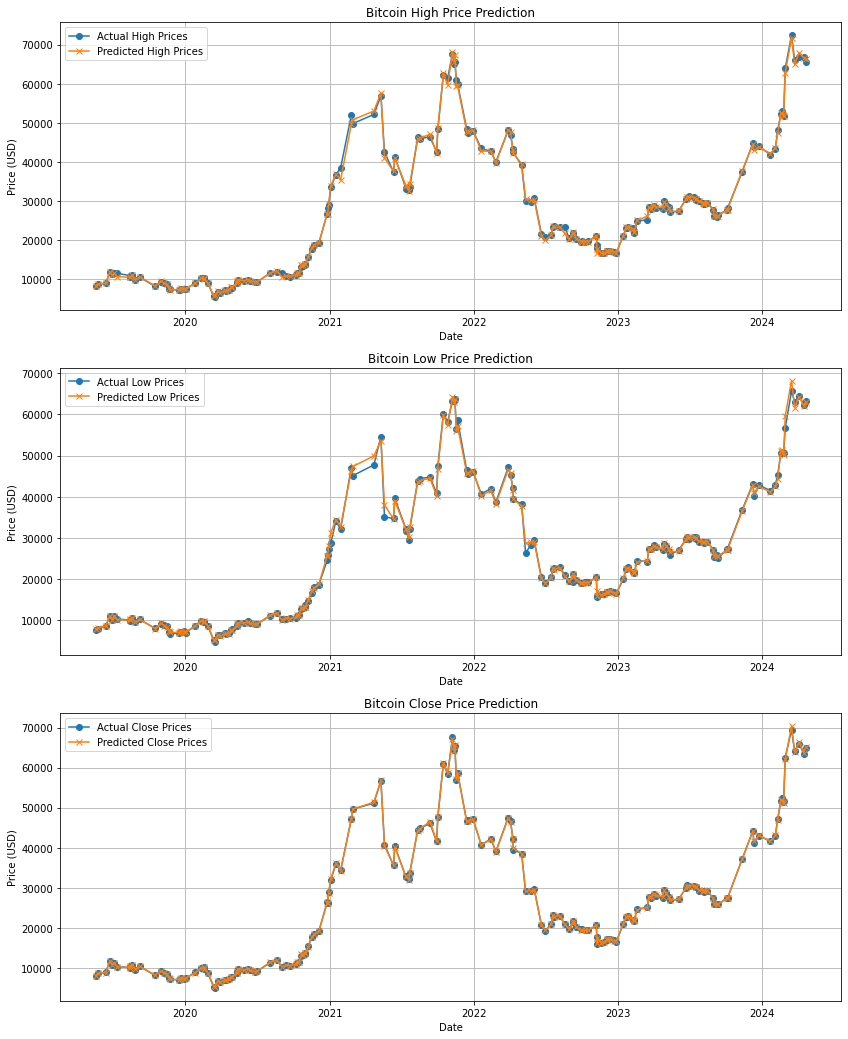

In [61]:
plt.figure(figsize=(14, 18))

plt.subplot(3, 1, 1)
plt.plot(results['Date'], results['Actual_High_Price'], label='Actual High Prices', marker='o')
plt.plot(results['Date'], results['Predicted_High_Price'], label='Predicted High Prices', marker='x')
plt.title('Bitcoin High Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(results['Date'], results['Actual_Low_Price'], label='Actual Low Prices', marker='o')
plt.plot(results['Date'], results['Predicted_Low_Price'], label='Predicted Low Prices', marker='x')
plt.title('Bitcoin Low Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(results['Date'], results['Actual_Close_Price'], label='Actual Close Prices', marker='o')
plt.plot(results['Date'], results['Predicted_Close_Price'], label='Predicted Close Prices', marker='x')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

## Predicting over the next 7 days

For this, I use the predicted close price as the opening price for the next day. We could also use the dataset for the real prices, and only use predicted price when predicting in the future. Wasn't sure about it.

In [168]:
input_date = "4/26/2024"
input_date = pd.to_datetime(input_date)

subset = df[df['Date'].between(input_date, input_date + pd.Timedelta(days=6))].drop(columns=['Date','BTC-High', 'BTC-Low', 'BTC-Close'])

In [169]:
predictions = []
days_in_data = len(subset)

for index, row in subset.iterrows():
    X_row = row.values.reshape(1,-1)
    prediction = rf_regressor.predict(X_row)
    prediction = np.append(prediction, input_date.strftime('%Y-%m-%d'))
    input_date += dt.timedelta(days=1)
    predictions.append(prediction)
if days_in_data < 7:
    for i in range(7 - days_in_data):
        X_row[0][0] = predictions[-1][-2]
        X_row[0][-1] = input_date.year
        X_row[0][-2] = input_date.day
        X_row[0][-3] = input_date.month
        prediction = rf_regressor.predict(X_row)
        prediction = np.append(prediction, input_date.strftime('%Y-%m-%d'))
        input_date += dt.timedelta(days=1)
        predictions.append(prediction)

/Users/viveksaravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/viveksaravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/viveksaravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/viveksaravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/viveksaravanan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fit

In [170]:
predictions

[array(['65415.842487699985', '63058.621518266584', '63785.2982312417',
        '2024-04-26'], dtype='<U32'),
 array(['64723.2874479467', '61855.09986262995', '63707.36007400837',
        '2024-04-27'], dtype='<U32'),
 array(['64700.6779167967', '61767.38078047996', '63712.366431483366',
        '2024-04-28'], dtype='<U32'),
 array(['64700.6779167967', '61767.38078047996', '63712.366431483366',
        '2024-04-29'], dtype='<U32'),
 array(['64700.6779167967', '61767.38078047996', '63712.366431483366',
        '2024-04-30'], dtype='<U32'),
 array(['64680.676660153345', '61835.170810369964', '63678.45580795671',
        '2024-05-01'], dtype='<U32'),
 array(['64660.96111335335', '61804.00870106996', '63658.856198556714',
        '2024-05-02'], dtype='<U32')]

In [174]:
high_prices = [float(arr[0]) for arr in predictions]
low_prices = [float(arr[1]) for arr in predictions]
close_prices = [float(arr[2]) for arr in predictions]

In [177]:
max(high_prices), min(low_prices), sum(close_prices)/len(close_prices)

(65415.842487699985, 61767.38078047996, 63709.58137231623)

# Old Method 

In [189]:
input_date = "3/31/2024"
input_row = df[df['Date'] == input_date].drop(columns=['Date','BTC-High', 'BTC-Low', 'BTC-Close'])

In [190]:
input_row

,BTC-Open,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,ETH-Close,ETH-Adj Close,ETH-Volume,DOGE-Open,...,GOLD-Open,GOLD-High,GOLD-Low,OIL-Price,OIL-Open,OIL-High,OIL-Low,Month,Day,Year
1800,69647.78125,71333.64844,2.005094e+10,3507.95166,3655.218994,3507.242676,3647.856445,3647.856445,10499881424,0.199413,...,2254.80,2254.80,2254.80,83.17,81.71,83.21,81.52,3,31,2024


In [191]:
input_features = pd.DataFrame(input_row)

In [192]:
input_date = pd.to_datetime(input_date)

predictions = []
for i in range(7):
    # Predict for the next day
    prediction = rf_regressor.predict(input_features)[0]
    prediction = np.append(prediction, input_date.strftime('%Y-%m-%d'))
    predictions.append(prediction)
    
    # Update input features for the next day
    input_date += dt.timedelta(days=1)
    input_features['Month'] = input_date.month
    input_features['Day'] = input_date.day
    input_features['Year'] = input_date.year
    input_features['BTC-Open'] = prediction[2]  # Use the predicted close price as the next day's open price


In [193]:
predictions

[array(['71480.10979901248', '69387.85786262914', '71030.86178950414',
        '2024-03-31'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-01'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-02'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-03'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-04'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-05'], dtype='<U32'),
 array(['71512.98209071251', '69272.83536246246', '70969.75835213748',
        '2024-04-06'], dtype='<U32')]

In [194]:
df_subset = df[input_row.index[0]: input_row.index[0]+7]

In [195]:
results = pd.DataFrame({
    'Date': [arr[3] for arr in predictions],
    'Actual_High_Price': df_subset['BTC-High'],
    'Predicted_High_Price': [float(arr[0]) for arr in predictions],
    'Actual_Low_Price': df_subset['BTC-Low'],
    'Predicted_Low_Price': [float(arr[1]) for arr in predictions],
    'Actual_Close_Price': df_subset['BTC-Close'],
    'Predicted_Close_Price': [float(arr[2]) for arr in predictions]
}).reset_index(drop=True)

In [196]:
results

,Date,Actual_High_Price,Predicted_High_Price,Actual_Low_Price,Predicted_Low_Price,Actual_Close_Price,Predicted_Close_Price
0,2024-03-31,71377.78125,71480.109799,69624.86719,69387.857863,71333.64844,71030.861790
1,2024-04-01,71342.09375,71512.982091,68110.69531,69272.835362,69702.14844,70969.758352
2,2024-04-02,69708.38281,71512.982091,64586.59375,69272.835362,65446.97266,70969.758352
3,2024-04-03,66914.32031,71512.982091,64559.89844,69272.835362,65980.81250,70969.758352
4,2024-04-04,69291.25781,71512.982091,65113.79688,69272.835362,68508.84375,70969.758352
5,2024-04-05,68725.75781,71512.982091,66011.47656,69272.835362,67837.64063,70969.758352
6,2024-04-06,69629.60156,71512.982091,67491.71875,69272.835362,68896.10938,70969.758352


In [197]:
# Highest High Price
results['Predicted_High_Price'].max(), results['Actual_High_Price'].max()

(71512.98209071251, 71377.78125)

In [198]:
# Lowest Low Price
results['Predicted_Low_Price'].min(), results['Actual_Low_Price'].min()

(69272.83536246246, 64559.89844)

In [199]:
# Avg Close Price
results['Predicted_Close_Price'].mean(), results['Actual_Close_Price'].mean()

(70978.48741461842, 68243.73939999999)

In [202]:
import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
